### CONFIGURAÇÕES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_graphviz

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [3]:
df_2020 = pd.read_csv('../../dobrano_2020_pre_preprocessado.csv', sep=';', low_memory=False, encoding='latin1')
df_2020.shape

(454432, 17)

In [4]:
df_2020.head()

,idade,sexo,raca_cor,escolaridade,local_ocorrencia,teve_assistencia_medica,dia_nasc,mes_nasc,ano_nasc,dia_obito,mes_obito,ano_obito,estado,grupo_causa_basica,causa_basica,ocupacao,grupo_ocupacao
0,68.0,M,BRANCA,EF_I,DOMICILIO,NAO,10,5.0,1951.0,25,1,2020,MG,Causas mal definidas e desconhecidas de mortal...,Outras causas mal definidas e as não especific...,NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
1,53.0,M,PRETA,EF_I,DOMICILIO,NAO,16,3.0,1966.0,25,1,2020,MG,Causas mal definidas e desconhecidas de mortal...,Outras causas mal definidas e as não especific...,Trabalhador agropecuário em geral,"TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA P..."
2,82.0,F,BRANCA,EF_I,HOSPITAL,NaN,10,7.0,1937.0,14,1,2020,MG,Outras doenças dos intestinos,"Doença diverticular do intestino, de localizaç...",NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
3,73.0,F,BRANCA,EF_I,HOSPITAL,SIM,2,11.0,1946.0,20,1,2020,MG,Outras doenças do aparelho respiratório,Insuficiência respiratória aguda,NaN,TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
4,60.0,M,BRANCA,SUPERIOR_C,HOSPITAL,SIM,12,9.0,1959.0,26,1,2020,MG,Outras doenças bacterianas,Septicemia não especificada,Professor da educação de jovens e adultos do ...,PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES ...


In [5]:
df_2020.isnull().sum()

idade                           0
sexo                            0
raca_cor                    22294
escolaridade                45280
local_ocorrencia                0
teve_assistencia_medica    147393
dia_nasc                        0
mes_nasc                    10319
ano_nasc                    10319
dia_obito                       0
mes_obito                       0
ano_obito                       0
estado                          0
grupo_causa_basica         113434
causa_basica                    0
ocupacao                   287875
grupo_ocupacao              80199
dtype: int64

#### REPREPROCESSAMENTO

In [6]:
df_2020 = df_2020.loc[df_2020['grupo_causa_basica'].notnull()]

In [7]:
df_2020 = df_2020.drop(columns=['dia_nasc', 'mes_nasc', 'ano_nasc', 'ocupacao', 'dia_obito'])

In [8]:
df_2020 = df_2020.loc[df_2020['raca_cor'].notnull()]

In [9]:
df_2020 = df_2020.loc[df_2020['teve_assistencia_medica'].notnull()]

In [10]:
df_2020 = df_2020.loc[df_2020['escolaridade'].notnull()]

In [11]:
df_2020['grupo_ocupacao'].fillna('SEM OCUPAÇÃO')

0         TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
1         TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA P...
3         TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
4         PROFISSIONAIS DAS CIÊNCIAS E DAS ARTES        ...
5         TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...
                                ...                        
454424    TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA P...
454428    TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
454429    TRABALHADORES EM SERVIÇOS DE REPARAÇÃO E MANUT...
454430    TRABALHADORES DA PRODUÇÃO DE BENS E SERVIÇOS I...
454431    TRABALHADORES AGROPECUÁRIOS, FLORESTAIS E DA P...
Name: grupo_ocupacao, Length: 204551, dtype: object

In [12]:
df_2020.shape

(204551, 12)

In [13]:
df = df_2020[:150000]

#### OneHotEncoder

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [ ]:
enc = OneHotEncoder()

In [50]:
enc.fit(df)

OneHotEncoder()

In [15]:
x = pd.get_dummies(df.drop(columns=['grupo_causa_basica']),drop_first=True)

#### Separando treino e teste

In [16]:
y = df['grupo_causa_basica']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#### DecisionTreeClassifier

In [18]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=90, min_samples_leaf=5, random_state = 100)

In [19]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=90, min_samples_leaf=5,
                       random_state=100)

In [20]:
y_pred = clf.predict(x_test)

In [21]:
score = accuracy_score(y_test, y_pred)

In [22]:
print(score)

0.7010666666666666


#### Plotando Árvore

In [143]:
!pip install pyparsing

In [145]:
!pip install pydotplus

In [23]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

RecursionError: maximum recursion depth exceeded while calling a Python object

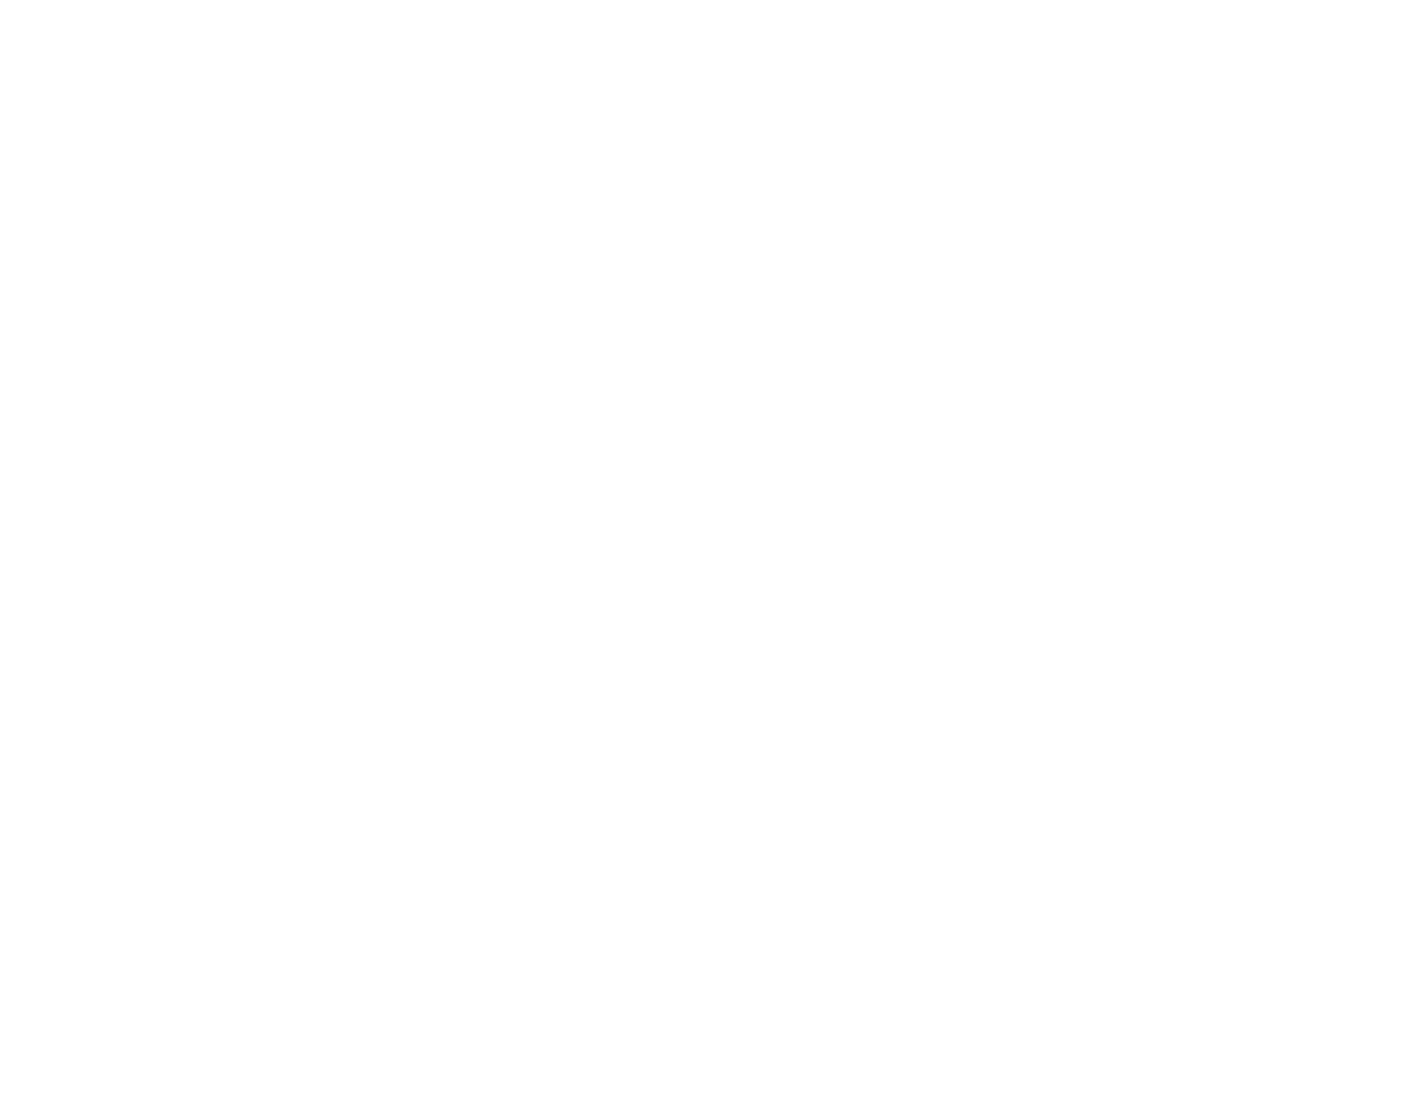

In [95]:
fig = plt.figure(figsize=(25, 20))
plot_tree(clf)